In [277]:
# Importando librerias
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [278]:
#importamos Data
df = pd.read_csv('titanic.csv')
df.head() # Muerstra los 5 primeros datos

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [279]:
df.tail() # Muestra los ultimos 5 datos

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [280]:
#Realizamos copia para manipular Data
df2 = df.copy()
df2.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [281]:
#Visualizamos Data de la columna x1 y x2
X = df2[["Fare","Parch"]]
X.head()

,Fare,Parch
0,7.2500,0
1,71.2833,0
2,7.9250,0
3,53.1000,0
4,8.0500,0


In [282]:
#Viasulizamos el valor minimo, maximo de la fila 0, y la cantidad de valores que tenemos en X
min(X.T[0]), max(X.T[0]), len(X)

(0.0, 7.25, 891)

In [283]:
#Visualizamos solo el primero valor de la columna x1
#X["Pclass"][1]

In [284]:
#Visualizamos los 5 primero valores de la columna y
y = df2[["SibSp"]]
y.head()

,SibSp
0,1
1,1
2,0
3,1
4,0


In [285]:
#Visuslizamos datos estadisticos importantes de la Data analizada
df2.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [286]:
#Declaramos una semilla la cual nos entregara un valor aleatorio para iniciar los pesos del perceptron
np.random.seed(42)

In [287]:
# Definicion de funciones
# Function step
# Prediccion
def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

In [288]:
# Perceptron
learn_rate = 0.02
epochs = 4

def perceptronStep(X, y, W, b, learn_rate = learn_rate):
    for i in range(len(X)):
        #print(X[i])
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b

In [289]:
# Entrenamiento de la neurona
def trainPerceptronAlgorithm(X, y, learn_rate = learn_rate, num_epochs = epochs):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # Lineas generadas a dibujar
    boundary_lines = []
    for i in range(num_epochs):
        # En cada epoca se aplica un paso del perceptron
        W, b = perceptronStep(X, y, W, b, learn_rate)
        W1, W2 = W
        print("El valor de W1 es: ", W1, "y el valor de W2 es:", W2, "de b es: ", b)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines

In [290]:
print("gwewe")

gwewe


In [291]:
df3 = df.copy()
df3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [292]:
df_upeu = df3[["Pclass","Age","Survived"]]
df_upeu.head()

,Pclass,Age,Survived
0,3,22.0,0
1,1,38.0,1
2,3,26.0,1
3,1,35.0,1
4,3,35.0,0


In [293]:
df_upeu = df_upeu.dropna() # elimino nan
df_upeu.head()

,Pclass,Age,Survived
0,3,22.0,0
1,1,38.0,1
2,3,26.0,1
3,1,35.0,1
4,3,35.0,0


In [294]:
def perceptron_run():
    #Convertir data de pandas a numpy
    data = df_upeu.to_numpy()

    
    #Separar la data variable e independiente
    X = data[:,:-1]
    y = data[:,-1]

    print(X)
    print("------------------------------")
    print(y)
    
    #Llamamos a la funcion que entrena al perceptron con los datos de entrenamiento 
    regression_coef = trainPerceptronAlgorithm(X, y)
    
    #Grafica de dispersion de los datos
    plt.figure()
    plt.title("Todas las rectas calculadas")
    X_ = data[:,0]
    y_ = data[:,1]
    data1 = [x for x in data if x[2] > 0]
    data0 = [x for x in data if x[2] == 0]
    X_min = X_.min()
    X_max = X_.max()
    data0_ = np.array(data0)
    X0_ = data0_[:,0]
    Y0_ = data0_[:,1]
    data1_ = np.array(data1)
    X1_ = data1_[:,0]
    Y1_ = data1_[:,1]
    plt.scatter(X1_, Y1_, zorder = 3, c='b')
    plt.scatter(X0_, Y0_, zorder = 3, c='r')
    
    #Mediamos la longitud de regression_coef para saber cuantas rectas se tendra que graficar
    s = len(regression_coef)
    
    #Graficamos todas las rectas probadas en la etapa de entrenamiento
    for i in range(s):
        a = 1+i
        #print(i)
        W, b = regression_coef[i]
        plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color=[0.5/a, 0.5, 0.5])
    # Utilizamos libreria Seaborn para graficar nuevamente
    sns.set()
    
    #Graficamos la mejor recta obtenida en la estapa de entrenamiento
    W, b = regression_coef[-1]
    fig=plt.figure()
    plt.title("Mejor recta obtenida")
    plt.scatter(X1_, Y1_, zorder = 3, c='b')
    plt.scatter(X0_, Y0_, zorder = 3, c='r')
    plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color=[0.5/a, 0.5, 0.5])

[[ 3. 22.]
 [ 1. 38.]
 [ 3. 26.]
 ...
 [ 1. 19.]
 [ 1. 26.]
 [ 3. 32.]]
------------------------------
[0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1.
 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1.
 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 1.

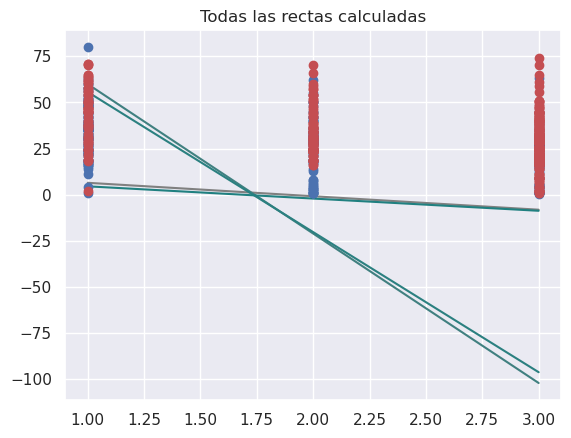

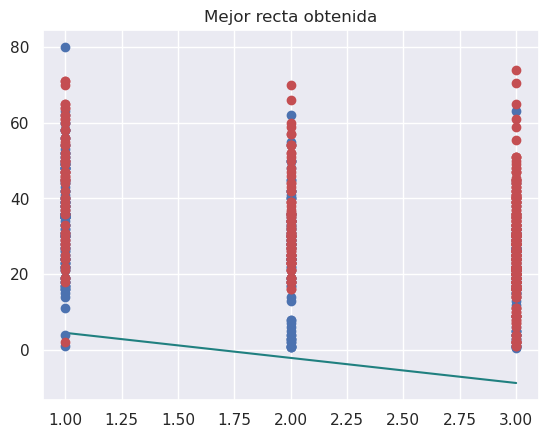

In [295]:
perceptron_run()